# Data Splitting and Processing
This notebook provides a comprehensive guide to data preprocessing, covering:
- Loading data
- Handling missing values
- Encoding categorical variables
- Scaling features
- Visualizing data
- Splitting into train and test sets

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Display options for better readability
pd.set_option('display.float_format', '{:.2f}'.format)

## 1. Loading Data
Let's start by creating a sample dataset with missing values and categorical data. This data will be used for the subsequent steps.

In [2]:
data = pd.DataFrame({
    'Age': [25, None, 30, 35, 45],
    'Height': [1.7, 1.8, None, 1.65, 1.75],
    'Weight': [65, 80, 70, None, 85],
    'City': ['NY', 'LA', 'NY', 'SF', 'LA'],
    'Score': [None, 65, 70, 80, 85]
})

print('Initial Dataset:')
data

Initial Dataset:


,Age,Height,Weight,City,Score
0,25.00,1.70,65.00,NY,NaN
1,NaN,1.80,80.00,LA,65.00
2,30.00,NaN,70.00,NY,70.00
3,35.00,1.65,NaN,SF,80.00
4,45.00,1.75,85.00,LA,85.00


## 2. Handling Missing Values
We'll handle missing values by:
- Filling `Age` with the median
- Filling `Height` and `Weight` with the mean
- Filling `Score` with a constant value of 0


In [3]:
# Handle missing values
data['Age'] = data['Age'].fillna(data['Age'].median())       # Median for 'Age'
data['Height'] = data['Height'].fillna(data['Height'].mean()) # Mean for 'Height'
data['Weight'] = data['Weight'].fillna(data['Weight'].mean()) # Mean for 'Weight'
data['Score'] = data['Score'].fillna(0)                          # Constant (0) for 'Score'

print('Data After Handling Missing Values:')
data

Data After Handling Missing Values:


,Age,Height,Weight,City,Score
0,25.00,1.70,65.00,NY,0.00
1,32.50,1.80,80.00,LA,65.00
2,30.00,1.73,70.00,NY,70.00
3,35.00,1.65,75.00,SF,80.00
4,45.00,1.75,85.00,LA,85.00


## 3. Encoding Categorical Variables
For categorical data, we'll use one-hot encoding to convert the `City` column into numerical format.

In [4]:
data = pd.get_dummies(data, columns=['City'], drop_first=True)
print('Data After One-Hot Encoding:')
data

Data After One-Hot Encoding:


,Age,Height,Weight,Score,City_NY,City_SF
0,25.00,1.70,65.00,0.00,True,False
1,32.50,1.80,80.00,65.00,False,False
2,30.00,1.73,70.00,70.00,True,False
3,35.00,1.65,75.00,80.00,False,True
4,45.00,1.75,85.00,85.00,False,False


## 4. Scaling the Data
We'll scale the numerical columns using **Standard Scaling** to make features have a mean of 0 and standard deviation of 1.

In [5]:
scaler = StandardScaler()
data[['Age', 'Height', 'Weight', 'Score']] = scaler.fit_transform(data[['Age', 'Height', 'Weight', 'Score']])

print('Data After Standard Scaling:')
data

Data After Standard Scaling:


,Age,Height,Weight,Score,City_NY,City_SF
0,-1.28,-0.50,-1.41,-1.95,True,False
1,-0.15,1.50,0.71,0.16,False,False
2,-0.53,0.00,-0.71,0.32,True,False
3,0.23,-1.50,0.00,0.65,False,True
4,1.73,0.50,1.41,0.81,False,False


## 5. Visualizing the Data
Visualizations help understand distributions and correlations among variables. Here, we'll use histograms and a heatmap to explore data distribution and correlations.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

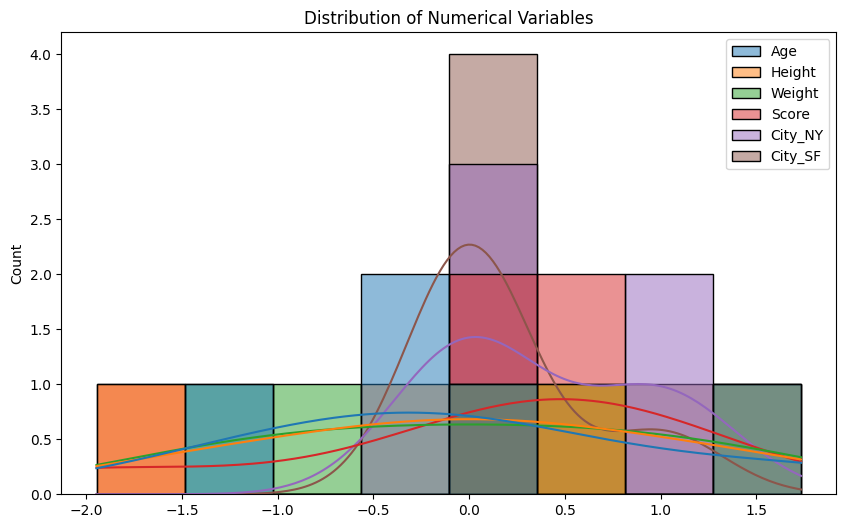

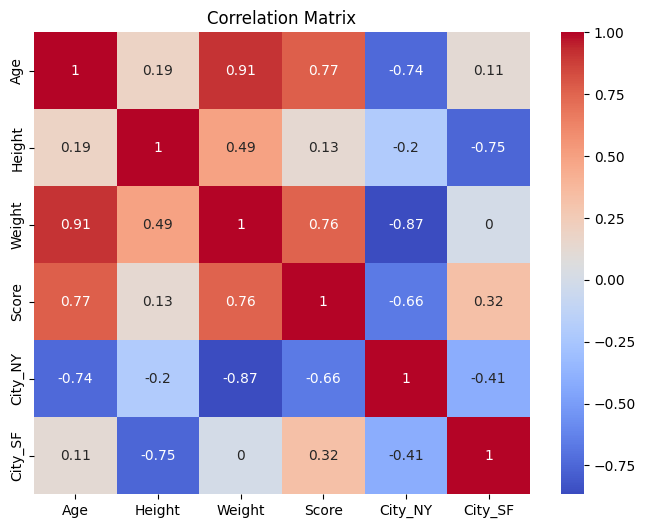

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True)
plt.title('Distribution of Numerical Variables')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 6. Splitting Data into Training and Testing Sets
Finally, we split the data into training and testing sets, with 80% for training and 20% for testing.

In [7]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

print('Training Data:')
print(train_data)

print('Testing Data:')
print(test_data)

Training Data:
    Age  Height  Weight  Score  City_NY  City_SF
4  1.73    0.50    1.41   0.81    False    False
2 -0.53    0.00   -0.71   0.32     True    False
0 -1.28   -0.50   -1.41  -1.95     True    False
3  0.23   -1.50    0.00   0.65    False     True
Testing Data:
    Age  Height  Weight  Score  City_NY  City_SF
1 -0.15    1.50    0.71   0.16    False    False
